# Lab 9, 29.04 - Titanic data exploration

In this lab you will be asked to look at raw data from titanic disaster.

Goals:
* Learn common plotting techniques (also using new package ``seaborn``)
* Learn about cleaning data (here imputing missing values)
* Learn how to do exploratory analysis
* Learn about prediction/regression


# Idea: 

exploratory analysis should usually start with posing questions, question for today: 

**what were important factors that decided if some survived or died in the event**

## Glossary of important pandas functions

### Ops on DF
* X[col_name] 
* Select by mask (TRUE/FALSE vector)
* X.describe()
* X.head()
* X.sort(col_name, ascenidng)/sort_index(ascenidng=)
* X.hist/plot
* X[col_name].notnull()

### Ops on more than 1 DF
* concat
* merge

In [61]:
import pandas as pd
import pandas_profiling
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
X = pd.read_csv("data/titanic.csv")

# Exercise 1 (broad analysis) 2 points
 * Load as csv data/5/titanic_train.csv
 * (How big is the dataset) How many data points are there?
 * How many people were in first class?
 * (How clean is the data) How many missing entries are there in the "Age" column?
 * What percentage of people survived? Plot histogram 
 * What percentage of male survived? ((x[x['Sex'] == 'male'] selects only male rows into separate dataframe))

# 1. Dealing with Missing Values

Ignore
    * drop rows with missing values train.dropna(axis=0)
    * drop cols with missing values train.dropna(axis=1)
Fill
    * fill with average
    * fill with most common value
    * fill with a resonable estimate

In [124]:
X = pd.read_csv("data/titanic.csv")
X.columns = [u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SiblingsAndSpouses', u'ParentsAndChildren',
       u'Ticket', u'Fare', u'Cabin', u'Embarked']
print X['Age'].isnull().value_counts() # How many nulls?

False    714
True     177
Name: Age, dtype: int64


In [78]:
print X['Age'].mean()
print X['Age'].median()
X['Age'][X['Age'].isnull()] = X['Age'].mean()
X['Age'].isnull().sum()

29.6991176471
28.0


/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0

In [79]:
print X['Age'].isnull().value_counts() # How many nulls?

False    891
Name: Age, dtype: int64


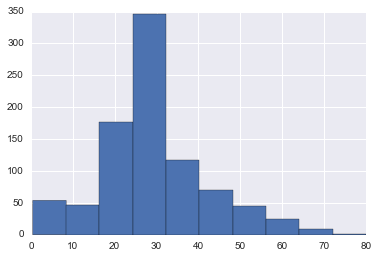

In [80]:
X['Age'].hist()

# 2. Plots

Kinds:
* scatter plot
* pairwise plot
* facet plot
* histogram (overlapping histograms)
* boxplot / violin plot

In [123]:
import numpy as np
# Replacing missing ages with median
X["Age"][np.isnan(X["Age"])] = np.median(X["Age"])

/Users/kudkudak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Histogram

In [108]:
mask = X['Survived'] == 1

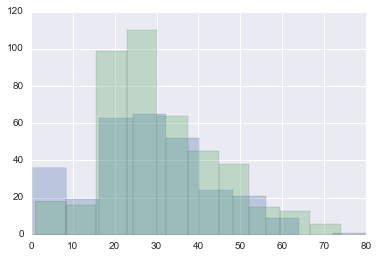

In [109]:
X[mask]['Age'].hist(alpha=0.3)
X[~mask]['Age'].hist(alpha=0.3)

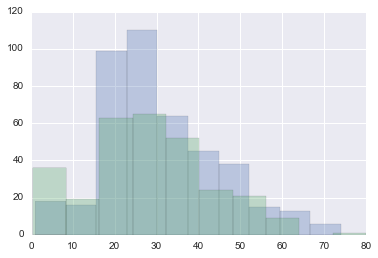

In [110]:
# Differently
for value, df in X.groupby("Survived")['Age']:
    df.hist(alpha=0.3)

## Scatterplot

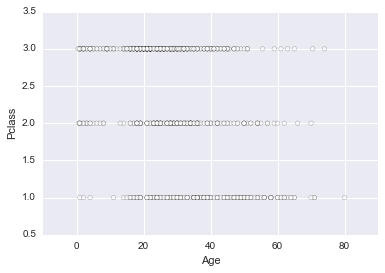

In [121]:
# Older => better passanger class
X.plot(kind="scatter", x="Age", y="Pclass", c=X['Survived']==1, alpha=0.5)

## Pair plot

In [137]:
X.loc[np.isnan(X["Age"]), "Age"] = X["Age"].median()

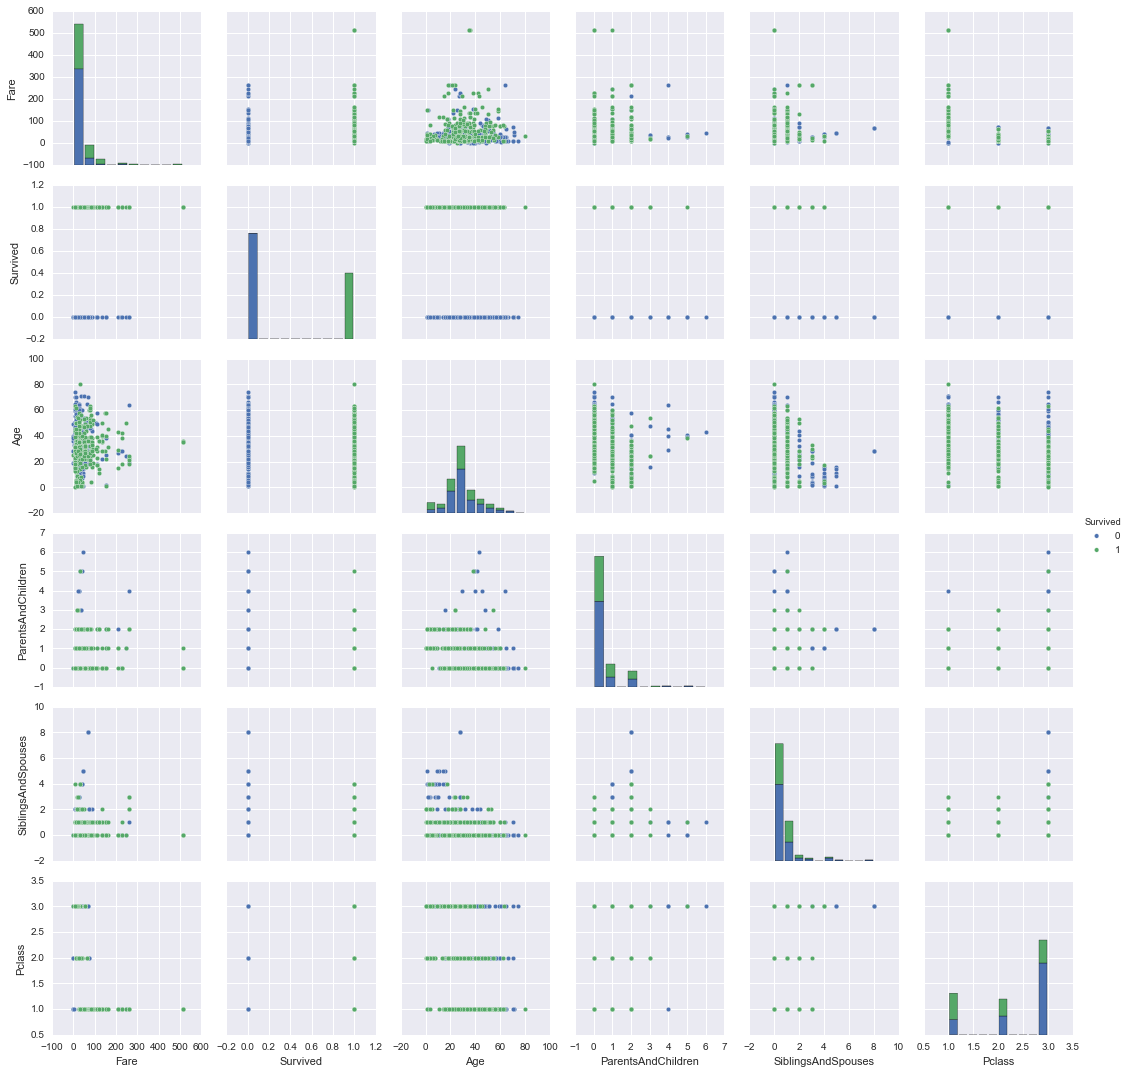

In [139]:
plt.figure()
sns.pairplot(data=X[["Fare","Survived","Age","ParentsAndChildren","SiblingsAndSpouses","Pclass"]],
             hue="Survived", dropna=True)

## Boxplot/violin plot

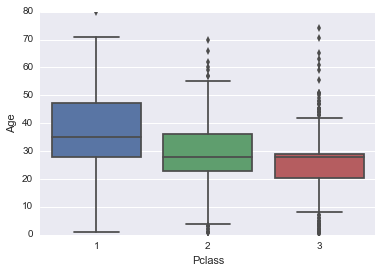

In [140]:
sns.boxplot(x="Pclass", y="Age", data=X)

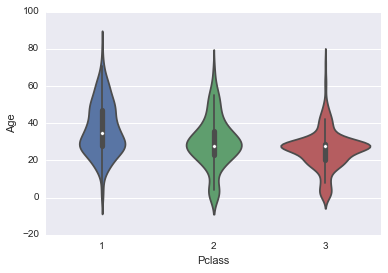

In [141]:
sns.violinplot(x="Pclass", y="Age", data=X)

# Exercise 2 (Documentation reading skills)

* See https://stanford.edu/~mwaskom/software/seaborn/examples/index.html
* Pick your favorite plot and use it to visualize something about data 

# Exercise 3 (Predicting survival rate via simple rules), 2 points

* Find 3 different simple rule tos decide if someone has survived, each with over 80% accuracy (you can use 2 features, for instance I used only "Sex")
* Calculate your accuracy (see sample code). 
* For each rule show a plot that best motivates your rule (for instance a scatter plot which shows clear separability of survived vs dead)
* Does average of rule performs best ? (Average = vote "Survived" if 2 out of 3 vote "Survived")

In [230]:
# 0a. Load train
X = pd.read_csv("data/titanic.csv")
X.columns = [u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SiblingsAndSpouses', u'ParentsAndChildren',
       u'Ticket', u'Fare', u'Cabin', u'Embarked']
X['Sex'] = X['Sex']=="male"

In [231]:
# 1. Rule definition
def survived(row):
    # Note: if you want to do some cleaning do it here
    # Note: don't use Survived column :)
    return False

In [232]:
# Slightly better rule
def survived2(row):
    return row['Sex'] == 0

In [233]:
# 2. Evaluate
def evaluate(rule):
    acc_train, acc_test = 0., 0.
    for _, row in X.iterrows():
        acc_train += (rule(row) == row['Survived'])

    print "Accuracy train = {}".format(acc_train/len(X))

In [234]:
# 3. Plot something that motivated your decision

In [235]:
print X.groupby("Survived")['Sex'].value_counts() # Hey value_counts works! Awesome

Survived  Sex  
0         True     468
          False     81
1         False    233
          True     109
dtype: int64


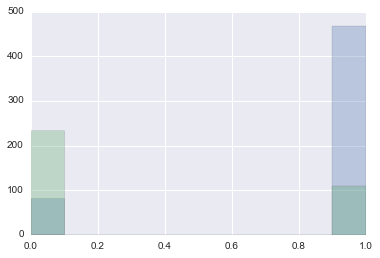

In [236]:
# Differently
for value, df in X.groupby("Survived")['Sex']:
    df.hist(alpha=0.3)

In [237]:
evaluate(survived)

Accuracy train = 0.616161616162


In [238]:
evaluate(survived2)

Accuracy train = 0.786756453423
